In [1]:
# Imports
import torch
import torchvision
from torchvision.datasets import MNIST

In [2]:
# Download training dataset
dataset = MNIST (root = 'data/', download = True)


In [3]:
test_dataset= MNIST (root = 'data/', train = False)

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
import torchvision.transforms as transforms

In [6]:
dataset= MNIST( root='data/', 
               train=True, 
               transform = transforms.ToTensor())

In [7]:
from torch.utils.data import random_split

train_ds, val_ds = random_split (dataset, [50000,10000])


In [8]:
from torch.utils.data import DataLoader

batch_size = 128

train_loader = DataLoader (train_ds, batch_size, shuffle =True)
val_loader = DataLoader (val_ds, batch_size)


In [9]:
!pip install jovian --upgrade --quiet

In [10]:
import jovian

In [11]:
jovian.commit(project= 'Working-with-Images-&-Logistic-Regression-in-PyTorch')

<IPython.core.display.Javascript object>

[jovian] Updating notebook "elahe-hosseinkhani/working-with-images-logistic-regression-in-pytorch" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/elahe-hosseinkhani/working-with-images-logistic-regression-in-pytorch


'https://jovian.ai/elahe-hosseinkhani/working-with-images-logistic-regression-in-pytorch'

In [12]:
# Model --> pred= x@ w.t() + b
import torch.nn as nn

input_size = 28*28
num_classes = 10

# Logistic Regression Model

model = nn.Linear(input_size, num_classes)

In [13]:
import torch.nn.functional as F

In [14]:
# Evaluation Metric and Loss Function

In [15]:
def accuracy (outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch. tensor(torch.sum(preds == labels).item()/len(preds))

In [16]:
loss_fn = F.cross_entropy

In [17]:
def fit (epochs, lr, model, train_loader, val_loader, opt_func= torch.optim.SGD):
    optimizer = opt_func(model.parameters(), lr)
    history = []  #for recording epoch_wise results
    
    for epoch in range (epochs) :
        
        # Training Phase
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward ()
            optimizer.step()
            optimizer.zero_grad()
        
        # Validation Phase
        result = evaluate (model, val_loader)
        model.epoch_end(epoch, result)
        history.append (result)
    return history

    


In [18]:
def evaluate (model, val_loader):
    outputs = [model.validation_step (batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

In [19]:
class MnistModel (nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear (input_size,num_classes)
        
    def forward (self, xb):
        xb= xb.reshape(-1,784)
        out = self.linear (xb)
        return out
    def training_step(self, batch):
        images , labels= batch
        out = self(images)       # Generate Predictions
        loss= F.cross_entropy (out, labels)    # Calculate Loss
        return loss
    def validation_step(self, batch):
        images, labels = batch
        out = self(images)
        loss= F.cross_entropy (out, labels)
        acc= accuracy (out, labels)
        return {'val_loss' : loss, 'val_acc':acc}
    def validation_epoch_end (self,outputs):
        batch_losses =[x['val_loss'] for x in outputs ]
        epoch_loss= torch.stack (batch_losses).mean() # Combine losses
        batch_acc= [x['val_acc'] for x in outputs]
        epoch_acc= torch.stack(batch_acc).mean()
        return {'val_loss': epoch_loss.item(), 'val_acc':epoch_acc.item()}
    def epoch_end(self,epoch,result):
        print("Epoch [{}], val_loss: {:,.4f}, val_acc {:.4f}".format(epoch,result['val_loss'], result ['val_acc']))

        
model = MnistModel()

In [20]:
result0 = evaluate (model, val_loader)
result0

{'val_loss': 2.2996826171875, 'val_acc': 0.08287183195352554}

In [21]:
history1 = fit (5,0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.9287, val_acc 0.6602
Epoch [1], val_loss: 1.6649, val_acc 0.7430
Epoch [2], val_loss: 1.4688, val_acc 0.7698
Epoch [3], val_loss: 1.3210, val_acc 0.7854
Epoch [4], val_loss: 1.2074, val_acc 0.7970


In [22]:
history2 = fit (5,0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.1182, val_acc 0.8050
Epoch [1], val_loss: 1.0466, val_acc 0.8113
Epoch [2], val_loss: 0.9880, val_acc 0.8154
Epoch [3], val_loss: 0.9391, val_acc 0.8209
Epoch [4], val_loss: 0.8977, val_acc 0.8250


In [23]:
history3 = fit (5,0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.8623, val_acc 0.8277
Epoch [1], val_loss: 0.8316, val_acc 0.8311
Epoch [2], val_loss: 0.8046, val_acc 0.8337
Epoch [3], val_loss: 0.7808, val_acc 0.8365
Epoch [4], val_loss: 0.7596, val_acc 0.8405


In [24]:
history4 = fit (5,0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.7406, val_acc 0.8430
Epoch [1], val_loss: 0.7234, val_acc 0.8464
Epoch [2], val_loss: 0.7079, val_acc 0.8485
Epoch [3], val_loss: 0.6937, val_acc 0.8489
Epoch [4], val_loss: 0.6806, val_acc 0.8498


Text(0.5, 1.0, 'Accuracy vs. No. of epoch')

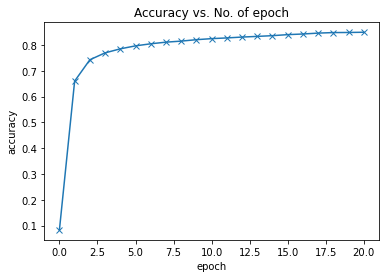

In [25]:
history = [result0]+ history1+history2+history3+ history4
accuracies= [result['val_acc'] for result in history]
plt.plot(accuracies,'-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title ('Accuracy vs. No. of epoch')

In [26]:
jovian.log_metrics(val_acc= history[-1]['val_acc'], val_loss= history[-1]['val_loss'])


[jovian] Metrics logged.


In [27]:
#Testing with individual images


In [28]:
# Define test dataset
test_dataset = MNIST(root='data/', 
                     train=False,
                     transform=transforms.ToTensor())

Shape: torch.Size([1, 28, 28])
Label: 7


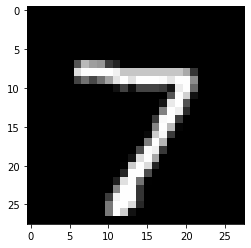

In [29]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Shape:', img.shape)
print('Label:', label)

In [30]:
def predict_image(img, model):
    xb = img.unsqueeze(0)
    # simply adds another dimension at the begining of the 1x28x28 tensor,
    # making it a 1x1x28x28 tensor, which the model views as
    # a batch containing a single image.

    yb = model(xb)
    _, preds = torch.max(yb, dim=1)
    return preds[0].item()


Label: 0 , Predicted: 0


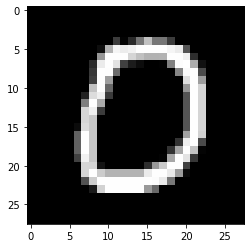

In [31]:
img, label = test_dataset[10]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 9 , Predicted: 4


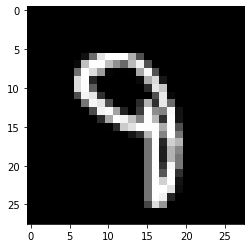

In [32]:
img, label = test_dataset[193]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))


Label: 2 , Predicted: 8


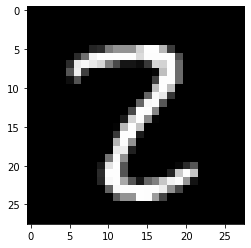

In [33]:
img, label = test_dataset[1839]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

In [34]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model, test_loader)
result

{'val_loss': 0.6402212381362915, 'val_acc': 0.8604491949081421}

In [35]:
#Saving and loading the model
torch.save(model.state_dict(), 'mnist-logistic.pth')


In [36]:
model.state_dict()


OrderedDict([('linear.weight',
              tensor([[ 2.1658e-02,  1.3733e-02,  9.5256e-06,  ...,  3.1937e-02,
                        1.5156e-02, -1.1369e-02],
                      [ 2.0681e-02,  4.9600e-03,  6.2107e-03,  ..., -3.2947e-02,
                       -4.1044e-03, -2.6723e-02],
                      [-1.8081e-02,  1.5844e-02, -2.4049e-03,  ...,  2.7703e-02,
                       -2.4102e-02,  2.0433e-02],
                      ...,
                      [ 2.5708e-02, -2.2408e-02, -3.1287e-02,  ...,  1.7122e-02,
                       -3.3302e-02,  1.3400e-02],
                      [-2.5709e-02,  3.2643e-02,  3.4073e-02,  ...,  1.6036e-02,
                        6.8738e-03,  2.4105e-02],
                      [-2.0743e-02, -1.8523e-02,  1.5054e-02,  ..., -1.3788e-02,
                       -1.8947e-03,  2.4930e-02]])),
             ('linear.bias',
              tensor([-0.0408,  0.0962, -0.0386, -0.0369,  0.0209,  0.0739,  0.0078,  0.0327,
                      -0.0847,

In [37]:
model2 = MnistModel()

In [38]:
model2.state_dict()


OrderedDict([('linear.weight',
              tensor([[-0.0100,  0.0347,  0.0279,  ...,  0.0251, -0.0010, -0.0344],
                      [ 0.0325,  0.0267,  0.0238,  ..., -0.0332, -0.0303,  0.0053],
                      [-0.0007,  0.0047, -0.0225,  ...,  0.0329, -0.0235,  0.0220],
                      ...,
                      [-0.0048,  0.0242, -0.0070,  ..., -0.0063, -0.0255,  0.0201],
                      [ 0.0256,  0.0299, -0.0229,  ..., -0.0028,  0.0165, -0.0309],
                      [ 0.0274, -0.0184,  0.0227,  ...,  0.0342, -0.0152,  0.0336]])),
             ('linear.bias',
              tensor([-0.0276,  0.0348,  0.0017,  0.0008, -0.0246,  0.0357,  0.0131,  0.0206,
                      -0.0195,  0.0304]))])

In [39]:
evaluate(model2, test_loader)

{'val_loss': 2.352658748626709, 'val_acc': 0.06855468451976776}

In [40]:
model2.load_state_dict(torch.load('mnist-logistic.pth'))
model2.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 2.1658e-02,  1.3733e-02,  9.5256e-06,  ...,  3.1937e-02,
                        1.5156e-02, -1.1369e-02],
                      [ 2.0681e-02,  4.9600e-03,  6.2107e-03,  ..., -3.2947e-02,
                       -4.1044e-03, -2.6723e-02],
                      [-1.8081e-02,  1.5844e-02, -2.4049e-03,  ...,  2.7703e-02,
                       -2.4102e-02,  2.0433e-02],
                      ...,
                      [ 2.5708e-02, -2.2408e-02, -3.1287e-02,  ...,  1.7122e-02,
                       -3.3302e-02,  1.3400e-02],
                      [-2.5709e-02,  3.2643e-02,  3.4073e-02,  ...,  1.6036e-02,
                        6.8738e-03,  2.4105e-02],
                      [-2.0743e-02, -1.8523e-02,  1.5054e-02,  ..., -1.3788e-02,
                       -1.8947e-03,  2.4930e-02]])),
             ('linear.bias',
              tensor([-0.0408,  0.0962, -0.0386, -0.0369,  0.0209,  0.0739,  0.0078,  0.0327,
                      -0.0847,

In [41]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model2, test_loader)
result

{'val_loss': 0.6402212381362915, 'val_acc': 0.8604491949081421}

In [42]:
jovian.commit(project='03-logistic-regression', environment=None, outputs=['mnist-logistic.pth'])

<IPython.core.display.Javascript object>

[jovian] Updating notebook "elahe-hosseinkhani/03-logistic-regression" on https://jovian.ai/
[jovian] Uploading additional outputs...
[jovian] Attaching records (metrics, hyperparameters, dataset etc.)
[jovian] Committed successfully! https://jovian.ai/elahe-hosseinkhani/03-logistic-regression


'https://jovian.ai/elahe-hosseinkhani/03-logistic-regression'